In [1]:
import pandas as pd
import numpy as np


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("kyphosis.csv")

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ KB


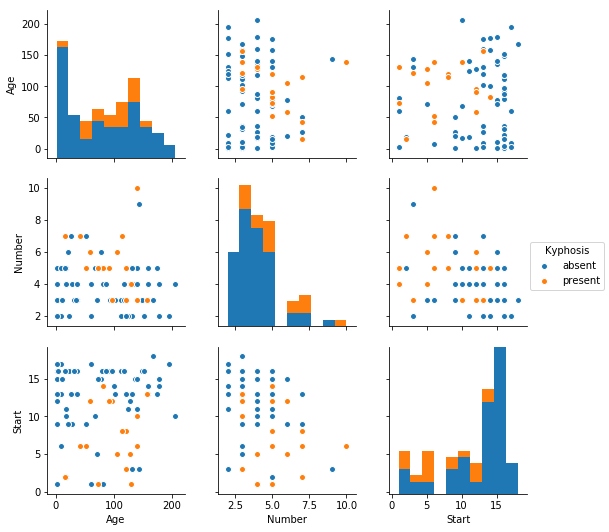

In [8]:
sns.pairplot(df,hue="Kyphosis")

In [9]:
from sklearn.cross_validation import train_test_split

/home/nishant/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
x=df.drop("Kyphosis",axis=1)

In [12]:
y=df["Kyphosis"]

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree=DecisionTreeClassifier()

In [18]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
prediction=dtree.predict(x_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(confusion_matrix(y_test,prediction))

[[13  6]
 [ 2  4]]


In [24]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

     absent       0.87      0.68      0.76        19
    present       0.40      0.67      0.50         6

avg / total       0.75      0.68      0.70        25



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc=RandomForestClassifier(n_estimators=200)

In [28]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
rfc_pred=rfc.predict(x_test)

In [31]:
print(confusion_matrix(y_test,rfc_pred))

[[16  3]
 [ 3  3]]


In [32]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.84      0.84      0.84        19
    present       0.50      0.50      0.50         6

avg / total       0.76      0.76      0.76        25

